In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import math
from scipy import stats
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.colors as colors
from datetime import datetime



In [2]:
data_monthly=pd.read_csv("http://hs.pangaea.de/Projects/TOAR/yearly_statistics/TOAR_sfc_ozone_monthly_global_2000-2004_v1_1.csv",skiprows=65,sep=';')

data_monthly=data_monthly[data_monthly['mean']>0]
print(len(data_monthly))
print(data_monthly.columns)

190997
Index(['numid', 'network_name', 'station_id', 'station_name',
       'station_country', 'station_type', 'station_type_of_area',
       'station_lat', 'station_lon', 'station_alt', 'station_google_alt',
       'station_etopo_relative_alt', 'station_population_density',
       'station_max_population_density_5km',
       'station_max_population_density_25km', 'station_nightlight_1km',
       'station_nightlight_5km', 'station_max_nightlight_25km',
       'station_htap_region', 'station_climatic_zone',
       'station_dominant_landcover', 'station_landcover_description',
       'station_nox_emissions', 'station_omi_no2_column',
       'station_toar_category', 'datetime', 'data_capture', 'mean',
       'avgdma8epax', 'w90', 'w126', 'median', 'p05', 'p10', 'p25', 'p75',
       'p90', 'p95', 'daytime_avg', 'nighttime_avg', 'daylight_avg', 'nvgt050',
       'nvgt060', 'nvgt070', 'nvgt080', 'nvgt090', 'nvgt100', 'nvgt120'],
      dtype='object')


In [3]:
data_monthly.datetime=[datetime.strptime(x, '%Y-%m-%d %H:%M') for x in data_monthly.datetime]
data_monthly2=data_monthly.set_index('datetime')
data_monthly2['month']=data_monthly2.index.month

/Users/jianghanyangli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/Users/jianghanyangli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/jianghanyangli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


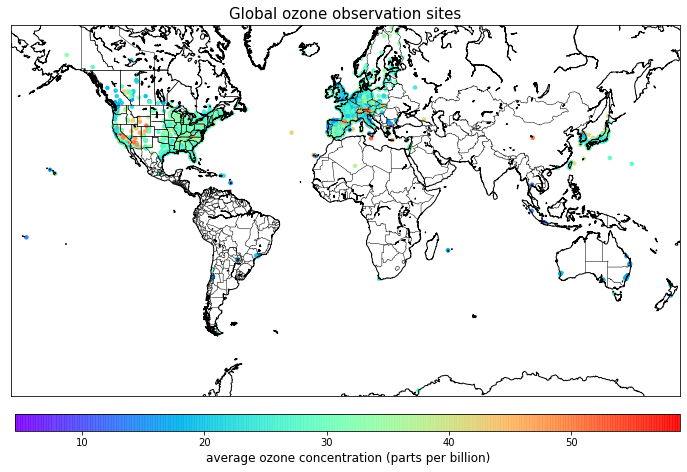

In [4]:
lat = data_monthly2.groupby('station_id')['station_lat'].mean().values
lon = data_monthly2.groupby('station_id')['station_lon'].mean().values
mean_03 = data_monthly2.groupby('station_id')['mean'].mean().values

fig = plt.figure(num=None, figsize=(12, 8))
plt.title('Global ozone observation sites',fontsize=15)
m1 = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=-179,urcrnrlon=180,resolution='l')
m1.drawcoastlines()
m1.drawstates()
m1.drawcountries()
x,y=m1(lon,lat)
cs1=plt.scatter(x,y,c=mean_03,cmap='rainbow',s=12,alpha=0.9)

cbaxes = fig.add_axes([0.13, 0.12, 0.77, 0.03]) 
cb = plt.colorbar(cs1,cax=cbaxes,orientation='horizontal')  
cb.set_label('average ozone concentration (parts per billion)',fontsize=12)

plt.show()


In [5]:
x=data_monthly2['month'].unique()

y2=data_monthly2[data_monthly2.station_type_of_area=='urban'].groupby(['month'])['mean'].mean()
stdev2=data_monthly2[data_monthly2.station_type_of_area=='urban'].groupby(['month'])['mean'].std()
y3=data_monthly2[data_monthly2.station_type_of_area=='suburban'].groupby(['month'])['mean'].mean()
stdev3=data_monthly2[data_monthly2.station_type_of_area=='suburban'].groupby(['month'])['mean'].std()
y4=data_monthly2[data_monthly2.station_type_of_area=='rural'].groupby(['month'])['mean'].mean()
stdev4=data_monthly2[data_monthly2.station_type_of_area=='rural'].groupby(['month'])['mean'].std()

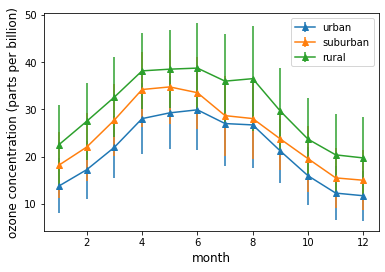

In [6]:
plt.errorbar(x, y2, stdev2, marker='^',label='urban')
plt.errorbar(x, y3, stdev3, marker='^',label='suburban')
plt.errorbar(x, y4, stdev4, marker='^',label='rural')
plt.xlabel('month',fontsize=12)
plt.ylabel('ozone concentration (parts per billion)',fontsize=12)
plt.legend()

plt.savefig('/Users/jianghanyangli/Documents/python/fig1.png')
plt.show()